# Importing libraries

In [1]:
import numpy as np #numpy is used for making numpy array
import pandas as pd #pandas is used for making dataframe
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Data Collection and Processing

In [2]:
#Loading the data with pandas
gold_data = pd.read_csv('gld_price_data.csv')

In [3]:
#Checking the first five rows
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
#Checking the head of the data
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
#Checking the tail of the data
gold_data.shape

(2290, 6)

In [8]:
#Getting some basic information of the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
#Checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [10]:
#getting statistical measures on this data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [36]:
gold_data[0]

KeyError: 0

# correlation Positive and negetive

In [11]:
correlation = gold_data.corr()
correlation

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


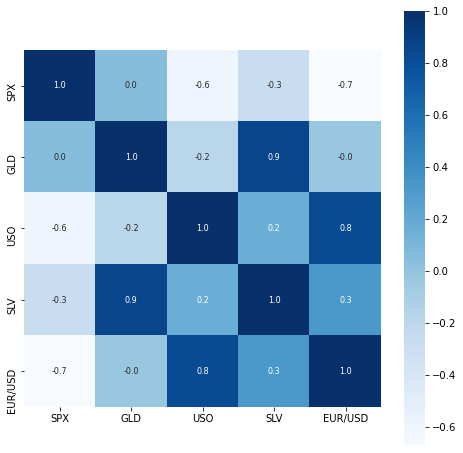

In [12]:
plt.figure (figsize = (8,8))
sns.heatmap(correlation, cbar = True , square = True, fmt = '.1f', annot = True, annot_kws = { 'size' : 8}, cmap = 'Blues')

In [13]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


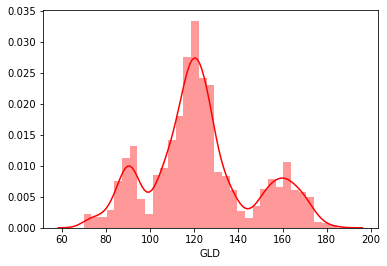

In [14]:
#Checking the distribujtion of the gold data
sns.distplot(gold_data['GLD'], color = 'red')

# Splitting the features and the target


In [6]:
Newdata = gold_data.drop(['Date', 'GLD'], axis =1)
goldata = gold_data['GLD']

In [7]:
print(Newdata)
print(goldata)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [8]:
X

NameError: name 'X' is not defined

# Splitting into training and testing data

In [9]:
Newdata_train, Newdata_test, goldata_train, goldata_test = train_test_split( Newdata, goldata, test_size = 0.2, random_state = 2)

In [10]:
Newdata_train

,SPX,USO,SLV,EUR/USD
476,1138.500000,39.790001,16.889999,1.361693
1958,2202.939941,10.630000,15.800000,1.063886
248,700.820007,24.480000,12.770000,1.256408
2231,2656.000000,11.890000,15.570000,1.225280
1325,1838.880005,33.040001,19.420000,1.366998
...,...,...,...,...
1071,1409.150024,32.320000,32.980000,1.287515
433,1132.989990,40.270000,17.230000,1.442398
674,1286.119995,38.610001,27.389999,1.357276
1099,1461.890015,33.919998,29.180000,1.306745


In [11]:
Newdata_test

,SPX,USO,SLV,EUR/USD
903,1351.949951,38.330002,32.900002,1.324854
129,1271.510010,93.900002,13.450000,1.472581
1787,1880.050049,8.910000,14.340000,1.119996
1913,2181.300049,10.960000,18.620001,1.127142
2048,2352.949951,10.680000,17.320000,1.067247
...,...,...,...,...
923,1370.869995,41.090000,33.220001,1.327492
1693,1952.290039,14.930000,13.990000,1.129089
2054,2349.010010,11.060000,17.430000,1.064453
658,1273.849976,37.680000,28.420000,1.315686


In [12]:
goldata_train

476     109.879997
1958    115.540001
248      90.930000
2231    125.370003
1325    119.889999
           ...    
1071    169.610001
433     109.800003
674     129.869995
1099    159.429993
1608    115.139999
Name: GLD, Length: 1832, dtype: float64

In [13]:
goldata_test

903     168.020004
129      81.230003
1787    112.320000
1913    127.589996
2048    119.620003
           ...    
923     166.380005
1693    106.379997
2054    122.239998
658     133.830002
376     102.360001
Name: GLD, Length: 458, dtype: float64

In [14]:
Regressor = RandomForestRegressor(n_estimators = 2)

In [15]:
Regressor.fit(Newdata_train, goldata_train)#Fitting the data into the model

RandomForestRegressor(n_estimators=2)

# now let predict the model

In [20]:
test_data_prediction 

array([167.8099975,  81.555    , 115.125    , 126.7750015, 121.875    ,
       154.095001 , 142.065002 , 126.189999 , 117.514999 , 125.0349995,
       117.940002 , 171.5950015, 142.5350035, 168.2449955, 116.110001 ,
       116.6150015, 134.100006 , 171.395004 , 164.095001 , 162.2450025,
       154.904999 , 126.040001 , 180.0550005, 158.770004 , 124.654999 ,
        94.0249975,  75.32     , 120.7749975, 119.1949995, 167.869995 ,
        88.6899985, 122.2700005,  92.3950005, 117.5149995, 122.079998 ,
       135.3899995, 114.510002 , 114.010002 , 145.079994 , 105.720001 ,
       105.410004 ,  87.0599975, 126.8149985, 118.564999 , 145.945    ,
       120.0200005, 108.8099975, 112.4749985,  92.614998 , 127.634998 ,
        72.7400015, 113.129997 , 120.455002 , 110.5849995, 119.119999 ,
       120.579998 , 159.5      , 161.520004 , 146.6849975,  86.3899995,
        93.7400015,  86.344997 ,  90.690002 , 119.2750015, 126.310001 ,
       127.419998 , 172.5      , 121.509998 , 118.099998 ,  97.5

In [17]:
Newdata_test

,SPX,USO,SLV,EUR/USD
903,1351.949951,38.330002,32.900002,1.324854
129,1271.510010,93.900002,13.450000,1.472581
1787,1880.050049,8.910000,14.340000,1.119996
1913,2181.300049,10.960000,18.620001,1.127142
2048,2352.949951,10.680000,17.320000,1.067247
...,...,...,...,...
923,1370.869995,41.090000,33.220001,1.327492
1693,1952.290039,14.930000,13.990000,1.129089
2054,2349.010010,11.060000,17.430000,1.064453
658,1273.849976,37.680000,28.420000,1.315686


In [19]:
test_data_prediction = Regressor.predict(Newdata_test)

# Tryn to predict on an asume unknown data

In [23]:
Newdata_test

,SPX,USO,SLV,EUR/USD
903,1351.949951,38.330002,32.900002,1.324854
129,1271.510010,93.900002,13.450000,1.472581
1787,1880.050049,8.910000,14.340000,1.119996
1913,2181.300049,10.960000,18.620001,1.127142
2048,2352.949951,10.680000,17.320000,1.067247
...,...,...,...,...
923,1370.869995,41.090000,33.220001,1.327492
1693,1952.290039,14.930000,13.990000,1.129089
2054,2349.010010,11.060000,17.430000,1.064453
658,1273.849976,37.680000,28.420000,1.315686


In [22]:
goldata_test

903     168.020004
129      81.230003
1787    112.320000
1913    127.589996
2048    119.620003
           ...    
923     166.380005
1693    106.379997
2054    122.239998
658     133.830002
376     102.360001
Name: GLD, Length: 458, dtype: float64

In [42]:
predict_data = Newdata_test.iloc[2]
predict_data

SPX        1880.050049
USO           8.910000
SLV          14.340000
EUR/USD       1.119996
Name: 1787, dtype: float64

In [75]:
pridicted_data = Newdata_test[['SPX','SLV']].filter(items =[1913], axis = 0)
pridicted_data

,SPX,SLV
1913,2181.300049,18.620001


In [68]:
Regressor.predict(pridicted_data)

array([126.7750015])

In [73]:
goldata_test[1913]

127.589996

# r square erroq

In [30]:
error_score = metrics.r2_score(goldata_test, test_data_prediction )

In [31]:
print('error score :',error_score )

error score : 0.9797894594019333


# Another way to detect the accuracy is to compare the actual value and the predicted value

In [32]:
goldata_test = list(goldata_test)

<function matplotlib.pyplot.show(*args, **kw)>

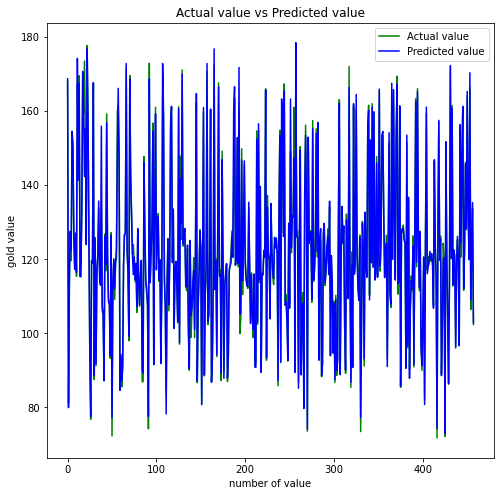

In [36]:
plt.figure(figsize = (8,8))
plt.plot(goldata_test, color = 'green', label = 'Actual value')
plt.plot(test_data_prediction, color = 'blue', label = 'Predicted value')
plt.xlabel('number of value')
plt.ylabel('gold value')
plt.title('Actual value vs Predicted value')
plt.legend()
plt.show